In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [5]:
# Load the data
df = pd.read_csv("datasets/cosmetic_preprocessed.csv")

# Check the first five rows 
display(df.sample(5))

# Inspect the types of products
display(df['Label'].value_counts())

,Label,brand,name,price,rank,ingredients,Combination,Dry,Full,Light,Matte,Medium,Natural,Normal,Oily,Radiant,Sensitive
903,Face Mask,DR. BRANDT SKINCARE,Hydro Biotic™ Recovery Sleeping Mask,52,4.6,-Biotic Balancing Complex: Works to optimize t...,1,1,0,0,0,0,0,1,1,0,1
704,Treatment,BECCA,Ever-Matte Poreless Priming Perfector,38,3.6,"Water, Magnesium Aluminum Silicate, Propylene ...",1,0,0,0,0,0,0,0,1,0,0
663,Treatment,DIOR,Capture Totale Dreamskin Advanced Refill,128,5.0,Visit the Dior boutique,1,1,0,0,0,0,0,1,1,0,1
342,Cleanser,CLINIQUE,Clarifying Lotion 2,16,4.4,"Water , Alcohol Denat. , Glycerin , Hamamelis ...",0,0,0,0,0,0,0,0,0,0,0
871,Face Mask,LA MER,The Brilliance Brightening Mask,250,4.4,Declustered Water (-)/Aqua/Eau De-Structuree (...,0,0,0,0,0,0,0,0,0,0,0


Moisturizer    298
Cleanser       281
Face Mask      266
Treatment      248
Eye cream      209
Sun protect    170
Name: Label, dtype: int64

In [6]:
# The Average price For each product
stat_market = df.groupby('Label').agg({'price':['max','mean', 'median'], 
                                            }).round(2).astype('int')
cm = sns.light_palette("green", as_cmap=True)
stat_market = stat_market.style.background_gradient(cmap=cm)
stat_market

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

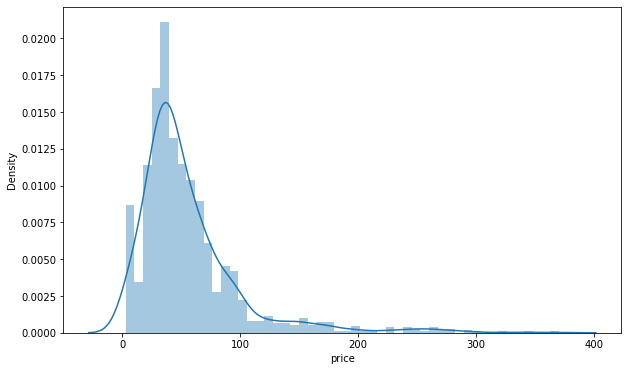

In [8]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])
plt.plot()

In [9]:
df.groupby('Label')['price'].mean().sort_values(ascending=False)

Label
Treatment      79.177419
Moisturizer    69.087248
Eye cream      63.602871
Sun protect    45.905882
Face Mask      42.624060
Cleanser       32.601423
Name: price, dtype: float64

In [10]:
df.groupby('brand')['price'].mean().sort_values(ascending=False).head(10)

brand
LA MER          184.333333
BIOEFFECT       171.250000
LIGHTSTIM       169.000000
SK-II           156.941176
LANCER          135.833333
OMOROVICZA      128.000000
GUERLAIN        118.833333
AMOREPACIFIC    103.523810
KAPLAN MD       100.000000
DIOR             95.259259
Name: price, dtype: float64

# Price vs Brands

[]

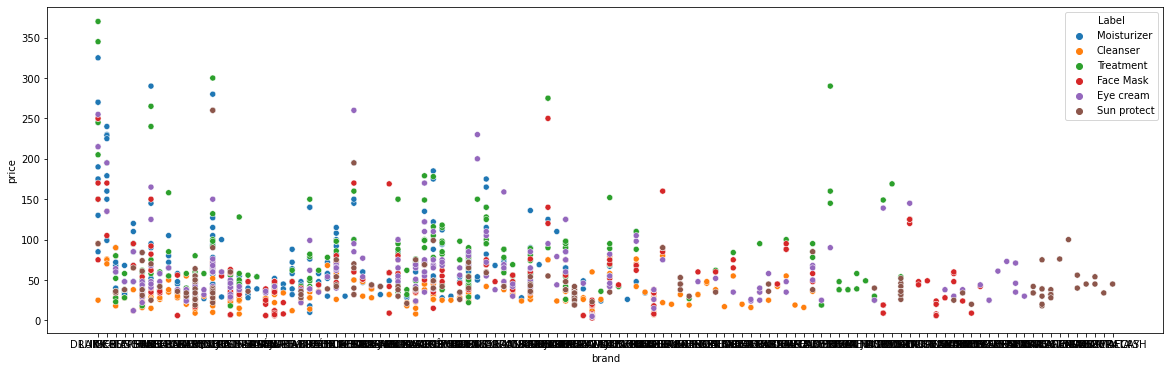

In [11]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=df, x='brand', y='price', hue='Label')
plt.plot()

# Price vs Reviews

[]

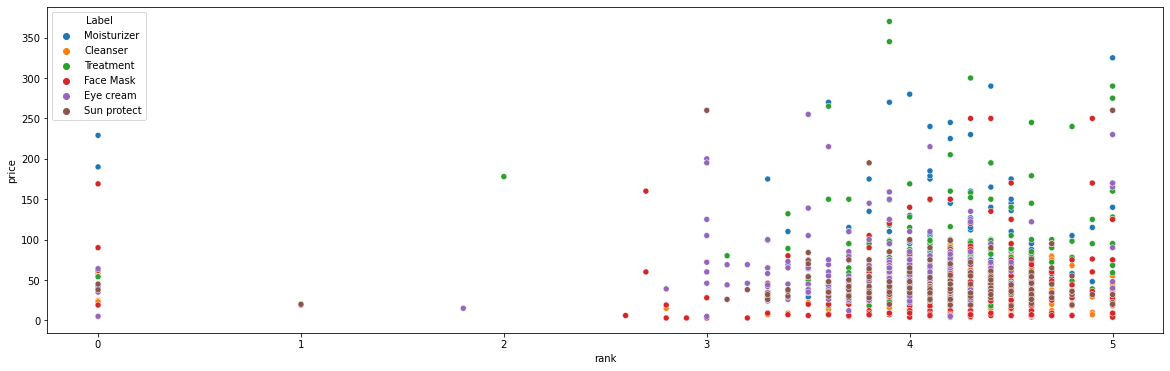

In [12]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=df, x='rank', y='price', hue='Label')
plt.plot()

[]

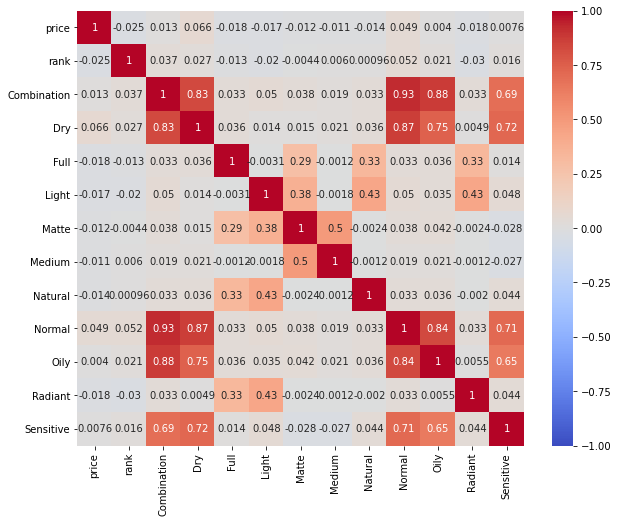

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.plot()

In [14]:
df.columns
df.dtypes

Label           object
brand           object
name            object
price            int64
rank           float64
ingredients     object
Combination      int64
Dry              int64
Full             int64
Light            int64
Matte            int64
Medium           int64
Natural          int64
Normal           int64
Oily             int64
Radiant          int64
Sensitive        int64
dtype: object

In [15]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   brand        1472 non-null   object 
 2   name         1472 non-null   object 
 3   price        1472 non-null   int64  
 4   rank         1472 non-null   float64
 5   ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Full         1472 non-null   int64  
 9   Light        1472 non-null   int64  
 10  Matte        1472 non-null   int64  
 11  Medium       1472 non-null   int64  
 12  Natural      1472 non-null   int64  
 13  Normal       1472 non-null   int64  
 14  Oily         1472 non-null   int64  
 15  Radiant      1472 non-null   int64  
 16  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(12), object(4)
memory usage: 195.6+ KB


,price,rank,Combination,Dry,Full,Light,Matte,Medium,Natural,Normal,Oily,Radiant,Sensitive
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.002038,0.004755,0.002717,0.000679,0.002038,0.652174,0.607337,0.002038,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.045114,0.068819,0.052075,0.026064,0.045114,0.476442,0.488509,0.045114,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df.head()

,Label,brand,name,price,rank,ingredients,Combination,Dry,Full,Light,Matte,Medium,Natural,Normal,Oily,Radiant,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,0,0,0,0,0,1,1,0,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"-Pitera™: A bio-ingredient rich in vitamins, o...",1,1,0,0,0,0,0,1,1,0,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,1,1,0,0,0,0,0,1,1,0,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,0,0,0,0,0,1,1,0,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,-Collagen: Supports skin elasticity for a yout...,1,1,1,0,0,0,1,1,1,0,1


In [17]:
df.sample(n=5, random_state=1)

,Label,brand,name,price,rank,ingredients,Combination,Dry,Full,Light,Matte,Medium,Natural,Normal,Oily,Radiant,Sensitive
481,Cleanser,CLINIQUE,Blackhead Solutions 7 Day Deep Pore Cleanse & ...,24,4.2,-Potent Blend of Salicylic Acid and Glucosamin...,1,1,0,0,0,0,0,1,1,0,1
1384,Sun protect,TARTE,Tarteguard 30 Vegan Sunscreen Lotion Broad Spe...,32,3.7,"-Maracuja: Visibly firms, brightens, and smoot...",1,1,0,0,0,0,0,1,1,0,1
309,Cleanser,SEPHORA COLLECTION,Cleansing & Exfoliating Wipes,7,4.5,#NAME?,0,0,0,0,0,0,0,0,0,0,0
421,Cleanser,LANCÔME,MOUSSE RADIANCE Clarifying Self-Foaming Cleanser,32,4.5,Visit the Lancôme boutique,0,0,0,0,0,0,0,0,0,0,0
980,Face Mask,SEPHORA COLLECTION,Face Mask - Lotus,6,4.2,"-Natural Lotus Flower, Aloe Vera Leaf, and Ric...",0,0,0,0,0,0,0,0,0,0,0


In [19]:
obj_df = df.select_dtypes(include='object')
obj_cols = obj_df.columns
obj_cols

Index(['Label', 'brand', 'name', 'ingredients'], dtype='object')

In [20]:
def describe_object(df, col_name):
 print(f"\nCOLUMN: {col_name}")
 print(f"{df[col_name].nunique()} different values")
for col_name in obj_cols:
 describe_object(df, col_name)
 df[col_name].value_counts(dropna=False, normalize=True)


COLUMN: Label
6 different values

COLUMN: brand
116 different values

COLUMN: name
1472 different values

COLUMN: ingredients
1312 different values


In [21]:
num_df = df.select_dtypes(include='number')
num_cols = num_df.columns
num_cols

Index(['price', 'rank', 'Combination', 'Dry', 'Full', 'Light', 'Matte',
       'Medium', 'Natural', 'Normal', 'Oily', 'Radiant', 'Sensitive'],
      dtype='object')

In [23]:
def describe_numeric(df, col_name):
 print(f"\nCOLUMN: {col_name}")
 print(f"Minimum: {df[col_name].min()}")
 print(f"Maximum: {df[col_name].max()}")
 print(f"Average: {df[col_name].mean()}")
 print(f"Standard Deviation: {df[col_name].std()}")
 print(f"Median: {df[col_name].median()}")
for col_name in num_cols:
 describe_numeric(df, col_name)


COLUMN: price
Minimum: 3
Maximum: 370
Average: 55.58423913043478
Standard Deviation: 45.014428945492625
Median: 42.5

COLUMN: rank
Minimum: 0.0
Maximum: 5.0
Average: 4.153260869565226
Standard Deviation: 0.6339180057003525
Median: 4.3

COLUMN: Combination
Minimum: 0
Maximum: 1
Average: 0.65625
Standard Deviation: 0.4751202931868524
Median: 1.0

COLUMN: Dry
Minimum: 0
Maximum: 1
Average: 0.6141304347826086
Standard Deviation: 0.48696544152012583
Median: 1.0

COLUMN: Full
Minimum: 0
Maximum: 1
Average: 0.0020380434782608695
Standard Deviation: 0.04511399466906332
Median: 0.0

COLUMN: Light
Minimum: 0
Maximum: 1
Average: 0.004755434782608696
Standard Deviation: 0.06881887851297556
Median: 0.0

COLUMN: Matte
Minimum: 0
Maximum: 1
Average: 0.002717391304347826
Standard Deviation: 0.05207542009265293
Median: 0.0

COLUMN: Medium
Minimum: 0
Maximum: 1
Average: 0.0006793478260869565
Standard Deviation: 0.02606430175713371
Median: 0.0

COLUMN: Natural
Minimum: 0
Maximum: 1
Average: 0.0020380434

C:\Users\sai.sarvani.yechuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

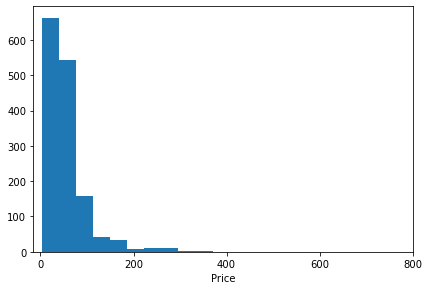

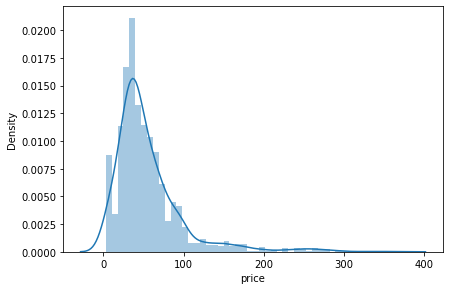

In [27]:
# Using matplotlib
import numpy as np
fig, (ax1) = plt.subplots(ncols=1, sharey=False)
plt.tight_layout()
ax1.hist(x=df.price)
ax1.set_xlabel('Price')
ax1.set_xticks(np.arange(0, 1000, 200))

# Using seaborn
fig, (ax1) = plt.subplots(ncols=1, sharey=False)
plt.tight_layout()
sns.distplot(df.price, ax=ax1)

Text(0.5, 0, 'Brand')

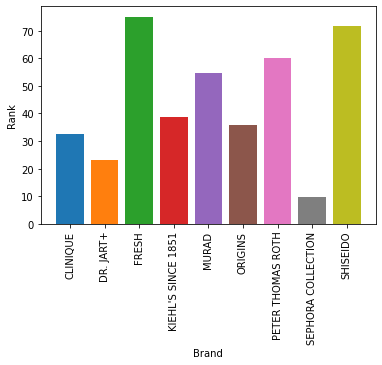

In [34]:
top_ten_product_type=df['brand'].value_counts(dropna=False, normalize=True)[:10].index.tolist()[:9]

df_top_product_type=df.loc[df['brand'].isin(top_ten_product_type)].dropna()
for brand, df_product_type_1 in df_top_product_type.groupby('brand'):
    avg_love=df_product_type_1.price.mean()
    plt.bar(brand, height=avg_love)
plt.xticks(rotation=90)
plt.ylabel('Rank')
plt.xlabel('Brand')

[Text(0.5, 0, 'Brand'), Text(0, 0.5, 'Price')]

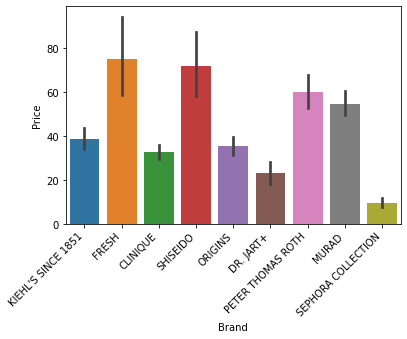

In [35]:
# Using Seaborn
df_top_product_type=df.loc[df['brand'].isin(top_ten_product_type)].dropna()
chart=sns.barplot(x=df_top_product_type.brand, y=df_top_product_type.price)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set(xlabel='Brand', ylabel='Price')

[Text(0, 0, 'Moisturizer'),
 Text(1, 0, 'Cleanser'),
 Text(2, 0, 'Treatment'),
 Text(3, 0, 'Face Mask'),
 Text(4, 0, 'Eye cream'),
 Text(5, 0, 'Sun protect')]

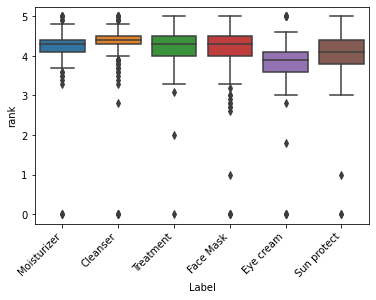

In [37]:
# Using Seaborn
chart=sns.boxplot(x='Label',y='rank', data= df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

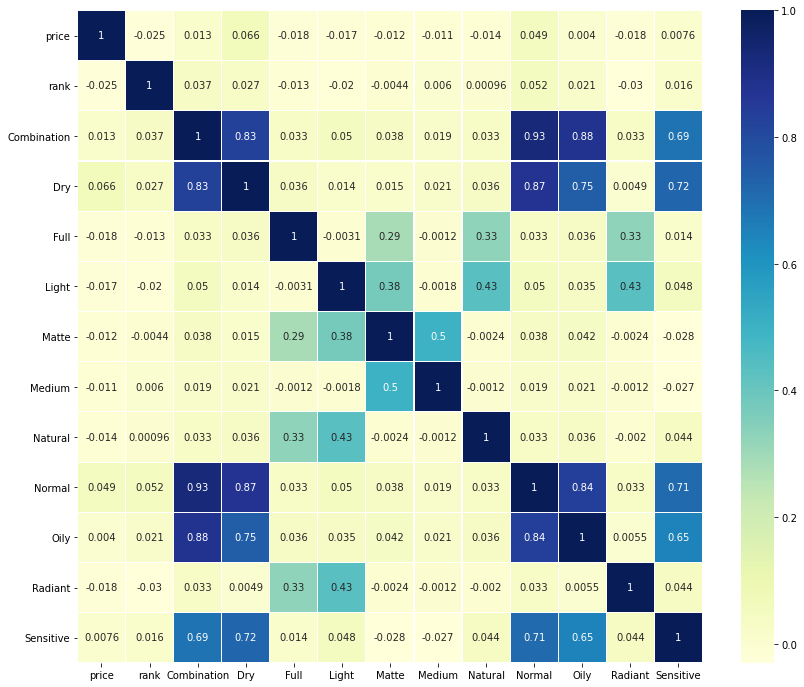

In [38]:
# correlation matrix between columns with heatmap
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);